In [44]:
# 1. Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import streamlit as st
import pickle

In [45]:
# 2. Load dataset
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")
df = pd.concat([train_data, test_data], sort=False)

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# summary statistics.

In [47]:
# Check data types of each column
df.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [48]:
# Summary statistics for numerical features
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [49]:
# Summary for object (categorical) features
df.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [50]:
# Missing value count
df.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

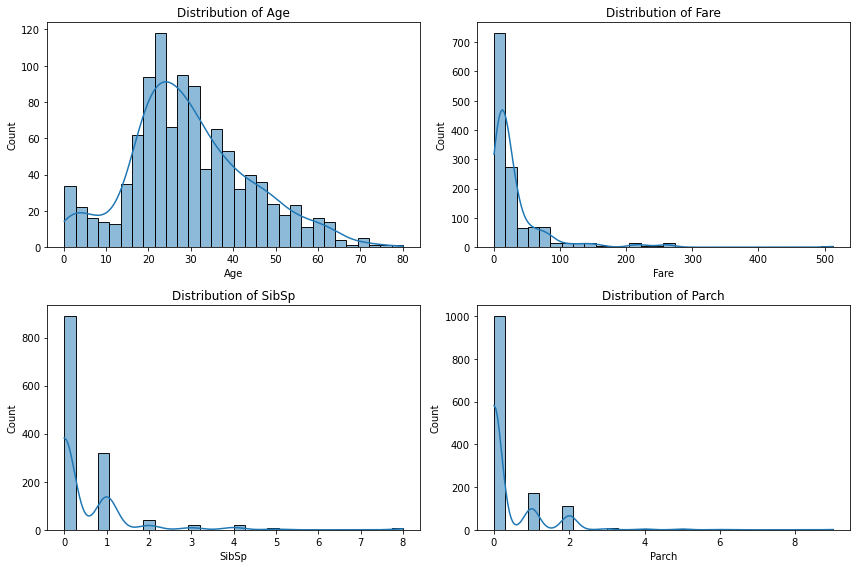

In [51]:
#Histograms for Numerical Feature Distributions
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

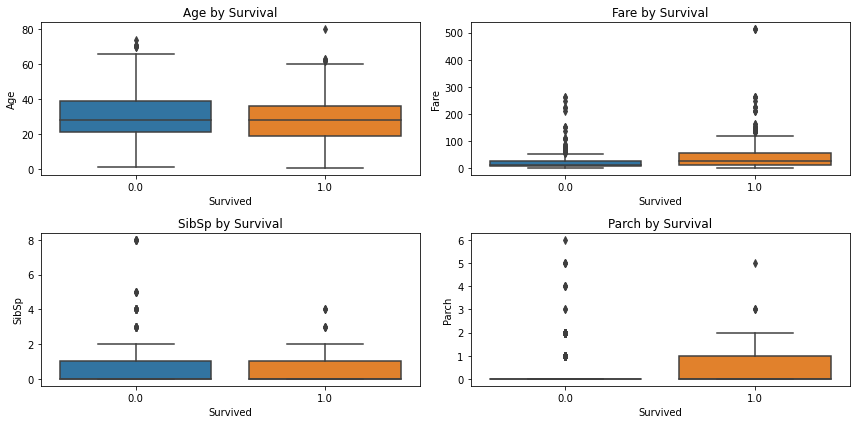

In [52]:
#BOXPLOTS
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Survived', y=col, data=df)
    plt.title(f'{col} by Survival')
plt.tight_layout()
plt.show()


In [53]:
#pair plotting
pair_cols = ['Survived', 'Pclass', 'Age', 'Fare', 'Sex']


In [54]:
print(df.columns[df.columns.duplicated()])


Index([], dtype='object')


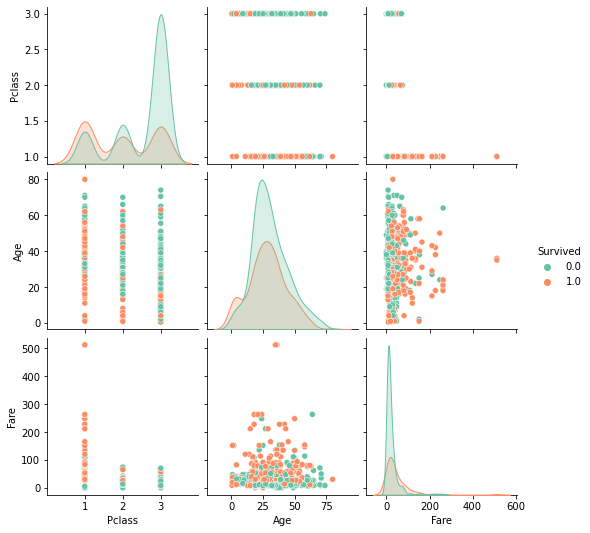

In [55]:
sns.pairplot(df[pair_cols].reset_index(drop=True), hue='Survived', palette='Set2')
plt.show()


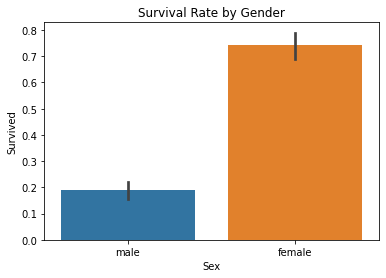

In [56]:
#Analysis
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


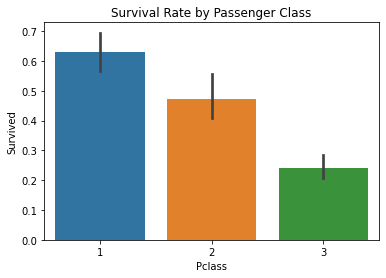

In [57]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [58]:
#CORRELATION
# Keep only numeric columns, then compute correlation with 'Survived'
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr()['Survived'].sort_values(ascending=False))


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


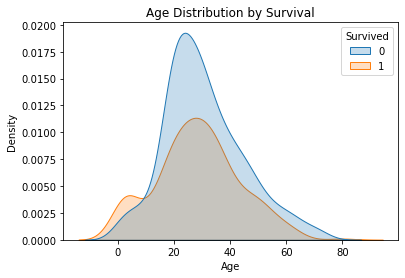

In [59]:
sns.kdeplot(data=train_data, x='Age', hue='Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.show()


In [60]:
'''
1.Survival Strongly Correlated with Gender

Female passengers had significantly higher survival rates than males.

This aligns with historical accounts of evacuation priorities.

2.Passenger Class Matters

First-class passengers were more likely to survive.

Third-class had the lowest survival rates—likely due to limited access to lifeboats or unfavorable cabin locations.

3.Fare Influences Survival

Passengers who paid higher fares were more likely to survive, suggesting wealthier individuals had better access to safety measures.

4.Age Patterns

Young children show a higher chance of survival.

Adults had varied survival depending on gender and class; elderly passengers didn't show a consistent trend.

5.Family Connections May Help—Up to a Point

Creating a FamilySize = SibSp + Parch + 1 feature could show that passengers with small families (2–4 people) had better survival odds than those alone or in large groups.

6.Embarkation Point (Port of Boarding)

Most passengers embarked from Southampton.

Slight variations in survival were visible among different embarkation ports, potentially tied to class distribution.
'''

"\n1.Survival Strongly Correlated with Gender\n\nFemale passengers had significantly higher survival rates than males.\n\nThis aligns with historical accounts of evacuation priorities.\n\n2.Passenger Class Matters\n\nFirst-class passengers were more likely to survive.\n\nThird-class had the lowest survival rates—likely due to limited access to lifeboats or unfavorable cabin locations.\n\n3.Fare Influences Survival\n\nPassengers who paid higher fares were more likely to survive, suggesting wealthier individuals had better access to safety measures.\n\n4.Age Patterns\n\nYoung children show a higher chance of survival.\n\nAdults had varied survival depending on gender and class; elderly passengers didn't show a consistent trend.\n\n5.Family Connections May Help—Up to a Point\n\nCreating a FamilySize = SibSp + Parch + 1 feature could show that passengers with small families (2–4 people) had better survival odds than those alone or in large groups.\n\n6.Embarkation Point (Port of Boarding)\

## DATA PREPROCESSING

In [61]:
#  Data Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

## Model Building:

In [62]:
# Separate train and test sets again
train_df = df[:len(train_data)]
test_df = df[len(train_data):]

#  Model Building
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation:

In [63]:
#Model Evaluation:
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_prob))


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC: 0.8823680823680824


## Interpret the Coefficients

In [64]:
# Extract coefficients as a Pandas SerieS

coefficients = pd.Series(model.coef_[0], index=X.columns)

# Sort and display
print("Logistic Regression Coefficients:")
print(coefficients.sort_values(ascending=False))


Logistic Regression Coefficients:
Fare        0.002533
Age        -0.030430
Parch      -0.111821
Embarked   -0.218847
SibSp      -0.293865
Pclass     -0.930726
Sex        -2.596710
dtype: float64


## Visualize Feature Significance

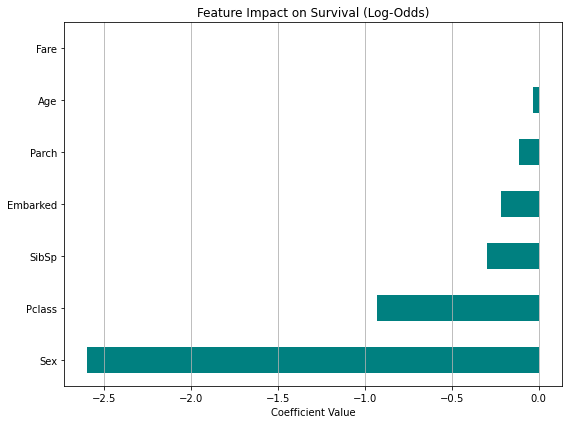

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
coefficients.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Impact on Survival (Log-Odds)')
plt.xlabel('Coefficient Value')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### Interpretation of Feature Significance

Based on the coefficients from the logistic regression model:

- **Sex**: This is one of the most influential features. Being male (Sex = 1) is negatively associated with survival, aligning with the "women and children first" evacuation protocol.
- **Pclass**: Higher class (Pclass = 1) passengers had higher survival odds. Lower classes (2 and especially 3) had reduced access to lifeboats or were further from exits.
- **Fare**: Passengers who paid higher fares were more likely to survive, indicating a link between economic status and safety.
- **Age**: Has a modest negative correlation with survival. Younger passengers, especially children, had a slightly higher chance.
- **Embarked**: Port of embarkation may reflect socio-economic groupings or ship layout, though its contribution is less strong compared to Sex and Pclass.
- **SibSp and Parch**: These family-based features suggest that having 1–2 family members improved survival chances, while large families or traveling alone may have reduced them.

These insights highlight that **socio-demographic variables and travel class played a crucial role** in determining survival outcomes.


In [66]:
import joblib
joblib.dump(model, "logistic_model.pkl")


['logistic_model.pkl']